# Install Library

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 5.2MB/s 


# Import Library
## Use Plotly is optional, Plotly chose because we can filter the data to be shown
### You can use Matplotlib as well

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# from keras.layers import LSTM
from pathlib import Path

In [5]:
import plotly.graph_objects as go
import plotly.io as pio
import chart_studio
import plotly.express as px
chart_studio.tools.set_credentials_file(username='DerniAgeng', api_key='ZMAguW1HDlV8v7EYvqVJ')

# Data Exploratory
Data Preprocessing For Changyuan Building

In [6]:
df = pd.read_csv("hotaiLog_2020_07-08.csv", encoding='latin-1')
df2 = pd.read_csv("hotaiLog_2020_0901-1025.csv", encoding='latin-1')
df3 = pd.read_csv('hotaiLog_2020_1026-1217.csv', encoding='latin-1', error_bad_lines=False)
df4 = pd.read_excel('hotaiLog_20201218-20210131.xlsx')
df5 = pd.read_excel('hotaiLog_20210201-20210315.xlsx')
df6 = pd.read_excel('hotaiLog_20210316-20210428.xlsx')
data = pd.concat([df,df2,df3,df4,df5,df6])
data.describe()

,meterType,slaveAddr,blockId,wire,freq,ua,ub,uc,uln_avg,uab,ubc,uca,ull_avg,ia,ib,ic,i_avg,pa,pb,pc,p_sum,qa,qb,qc,q_sum,sa,sb,sc,s_sum,pfa,pfb,pfc,pf_avg,aea,aeb,aec,ae_tot,rea,reb,rec,re_tot,u1_thd,u2_thd,u3_thd,uavg_thd,i1_thd,i2_thd,i3_thd,iavg_thd,tpd
count,2.721346e+06,2.721346e+06,2.721346e+06,2721346.0,2.721346e+06,791020.0,791000.0,790992.0,790999.000000,790995.000000,791045.000000,791057.000000,402026.000000,791046.000000,791051.000000,791049.000000,791050.000000,7.910520e+05,791038.0,7.909110e+05,2.721346e+06,4.017260e+05,401723.0,4.016980e+05,8.095530e+05,401650.000000,401645.0,401639.000000,8.096360e+05,4.019080e+05,401909.0,4.019270e+05,790956.000000,389020.0,389020.0,389020.0,2.721346e+06,0.0,0.0,0.0,2.416240e+06,488607.000000,401897.000000,401903.0,401915.000000,401927.000000,401934.0,401947.000000,401981.000000,85412.000000
mean,2.178861e+00,1.963350e+00,1.518149e+00,1.0,6.452273e+01,0.0,0.0,0.0,111.083871,111.581967,111.418661,110.316061,6060.274317,5.207587,1.825411,5.083003,4.969421,8.712121e+07,0.0,6.147482e+04,1.013463e+08,2.156554e+08,0.0,5.230725e+08,6.510083e+08,35199.198693,0.0,33847.847094,3.116231e+04,1.705724e+05,0.0,7.574665e+01,15.408444,0.0,0.0,0.0,3.155010e+05,NaN,NaN,NaN,4.478197e+07,1.603651,1.718447,0.0,1.717244,11.280168,0.0,7.403714,10.473974,28753.520957
std,1.252706e+00,1.208750e+00,2.226986e+00,0.0,5.435069e+01,0.0,0.0,0.0,112.925566,113.379064,113.219524,112.099977,5590.895166,15.826376,8.365916,15.710007,15.303209,4.236681e+08,0.0,9.956103e+06,4.553222e+08,6.453977e+08,0.0,9.217695e+08,9.870009e+08,80031.904405,0.0,80116.079500,1.018043e+05,5.806943e+05,0.0,1.267398e+04,26.764026,0.0,0.0,0.0,4.729309e+05,NaN,NaN,NaN,8.722777e+07,0.846525,0.780536,0.0,0.782266,14.696271,0.0,16.050158,14.217774,28017.892397
min,1.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,216.200000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,4.000000e-03,0.000000,0.0,0.0,0.0,0.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,523.000000
25%,1.000000e+00,1.000000e+00,0.000000e+00,1.0,5.996000e+01,0.0,0.0,0.0,0.000000,0.100000,0.100000,0.100000,224.200000,0.000000,0.000000,0.000000,0.053000,0.000000e+00,0.0,0.000000e+00,2.260000e+02,0.000000e+00,0.0,0.000000e+00,3.400000e+01,0.000000,0.0,0.000000,9.900000e+01,5.660000e-01,0.0,9.050000e-01,0.929000,0.0,0.0,0.0,2.503970e+04,NaN,NaN,NaN,1.628900e+03,1.500000,1.600000,0.0,1.600000,0.000000,0.0,0.000000,0.000000,3939.000000
50%,3.000000e+00,2.000000e+00,0.000000e+00,1.0,6.000000e+01,0.0,0.0,0.0,0.000000,0.100000,0.100000,0.100000,10937.700000,0.219000,0.000000,0.164000,0.280000,0.000000e+00,0.0,0.000000e+00,3.452000e+03,7.153000e+03,0.0,0.000000e+00,6.997000e+03,5485.000000,0.0,0.000000,1.228000e+03,8.780000e-01,0.0,1.000000e+00,1.000000,0.0,0.0,0.0,6.767985e+04,NaN,NaN,NaN,1.474330e+04,1.900000,1.900000,0.0,1.900000,7.400000,0.0,0.000000,7.300000,16018.000000
75%,3.000000e+00,2.000000e+00,2.000000e+00,1.0,6.003000e+01,0.0,0.0,0.0,225.900000,226.800000,226.500000,224.300000,11552.100000,2.972000,1.584000,3.006000,3.159000,2.063000e+03,0.0,0.000000e+00,2.438600e+04,6.290000e+04,0.0,1.802358e+05,2.147484e+09,25146.250000,0.0,20076.500000,1.116400e+04,1.000000e+00,0.0,1.000000e+00,1.000000,0.0,0.0,0.0,4.298924e+05,NaN,NaN,NaN,6.796300e+04,2.100000,2.100000,0.0,2.200000,16.400000,0.0,8.200000,14.200000,50104.000000
max,5.000000e+00,7.000000e+00,8.000000e+00,1.0,6.553500e+02,0.0,0.0,0.0,233.600000,234.800000,234.100000,231.700000,12126.500000,256.825000,179.872000,258.035000,277.643000,2.147484e+09,0.0,2.147484e+09,2.147484e+09,2.147484e+09,0.0,2.147484e+09,2.147484e+09,788292.000000,0.0,787502.000000,1.364019e+06,2.147484e+06,0.0,2.147484e+06,65.535000,0.0,0.0,0.0,1.941646e+06,NaN,NaN,NaN,2.147484e+08,5.700000,5.600000,0.0,5.500000,138.700000,0.0,

## Select EQID from Changyuan building

In [7]:
changyuan = data[data['equipmentId'].isin(['001003f4e11ed5c10c000002'])]
changyuan.head()

,IoTHubDeviceId,equipmentId,meterType,lastReportTime,slaveAddr,blockId,wire,freq,ua,ub,uc,uln_avg,uab,ubc,uca,ull_avg,ia,ib,ic,i_avg,pa,pb,pc,p_sum,qa,qb,qc,q_sum,sa,sb,sc,s_sum,pfa,pfb,pfc,pf_avg,aea,aeb,aec,ae_tot,rea,reb,rec,re_tot,u1_thd,u2_thd,u3_thd,uavg_thd,i1_thd,i2_thd,i3_thd,iavg_thd,CreatedAt,tpd
6,001003f4e11ed5c10c000000,001003f4e11ed5c10c000002,3,2020-07-01 00:03:55,2,1,1,59.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32529.4,NaN,NaN,NaN,9529.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-01 00:04:02.970000000,NaN
7,001003f4e11ed5c10c000000,001003f4e11ed5c10c000002,3,2020-07-01 00:03:55,2,2,1,59.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16659.9,NaN,NaN,NaN,3135.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-01 00:04:03.577000000,NaN
8,001003f4e11ed5c10c000000,001003f4e11ed5c10c000002,3,2020-07-01 00:03:56,2,3,1,59.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20435.7,NaN,NaN,NaN,9740.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-01 00:04:04.183000000,NaN
9,001003f4e11ed5c10c000000,001003f4e11ed5c10c000002,3,2020-07-01 00:03:57,2,4,1,59.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19451.5,NaN,NaN,NaN,23309.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-01 00:04:04.253000000,NaN
10,001003f4e11ed5c10c000000,001003f4e11ed5c10c000002,3,2020-07-01 00:03:57,2,5,1,59.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67932.9,NaN,NaN,NaN,49847.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-01 00:04:04.770000000,NaN


## Separate Numerical Column

In [8]:
vars_num_anom = [var for var in changyuan.columns if data[var].dtypes != 'O']
changyuan[vars_num_anom].head()

,meterType,slaveAddr,blockId,wire,freq,ua,ub,uc,uln_avg,uab,ubc,uca,ull_avg,ia,ib,ic,i_avg,pa,pb,pc,p_sum,qa,qb,qc,q_sum,sa,sb,sc,s_sum,pfa,pfb,pfc,pf_avg,aea,aeb,aec,ae_tot,rea,reb,rec,re_tot,u1_thd,u2_thd,u3_thd,uavg_thd,i1_thd,i2_thd,i3_thd,iavg_thd,tpd
6,3,2,1,1,59.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32529.4,NaN,NaN,NaN,9529.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,2,2,1,59.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16659.9,NaN,NaN,NaN,3135.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,2,3,1,59.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20435.7,NaN,NaN,NaN,9740.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3,2,4,1,59.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19451.5,NaN,NaN,NaN,23309.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,3,2,5,1,59.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67932.9,NaN,NaN,NaN,49847.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check Missing Percentage

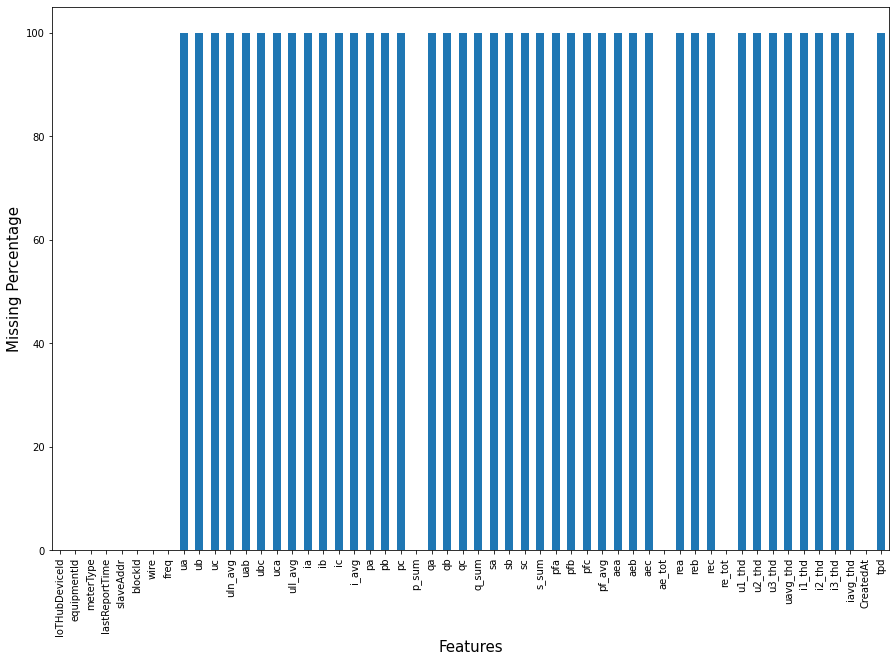

In [9]:
missing_value = changyuan.isna().mean() * 100
missing_value.plot(kind='bar', figsize=(15,10))
plt.ylabel('Missing Percentage', size=15)
plt.xlabel('Features', size=15)
plt.show()

In [10]:
changyuan.columns

Index(['IoTHubDeviceId', 'equipmentId', 'meterType', 'lastReportTime',
       'slaveAddr', 'blockId', 'wire', 'freq', 'ua', 'ub', 'uc', 'uln_avg',
       'uab', 'ubc', 'uca', 'ull_avg', 'ia', 'ib', 'ic', 'i_avg', 'pa', 'pb',
       'pc', 'p_sum', 'qa', 'qb', 'qc', 'q_sum', 'sa', 'sb', 'sc', 's_sum',
       'pfa', 'pfb', 'pfc', 'pf_avg', 'aea', 'aeb', 'aec', 'ae_tot', 'rea',
       'reb', 'rec', 're_tot', 'u1_thd', 'u2_thd', 'u3_thd', 'uavg_thd',
       'i1_thd', 'i2_thd', 'i3_thd', 'iavg_thd', 'CreatedAt', 'tpd'],
      dtype='object')

## Replace the wrong value to 'NaN'

In [11]:
changyuan[vars_num_anom] = changyuan[vars_num_anom].replace(
    {2147483647:np.NaN})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
changyuan[vars_num_anom].describe()
# vars_na = [var for var in data.columns]
# data.isnull().mean()

,meterType,slaveAddr,blockId,wire,freq,ua,ub,uc,uln_avg,uab,ubc,uca,ull_avg,ia,ib,ic,i_avg,pa,pb,pc,p_sum,qa,qb,qc,q_sum,sa,sb,sc,s_sum,pfa,pfb,pfc,pf_avg,aea,aeb,aec,ae_tot,rea,reb,rec,re_tot,u1_thd,u2_thd,u3_thd,uavg_thd,i1_thd,i2_thd,i3_thd,iavg_thd,tpd
count,667974.0,667974.0,667974.000000,667974.0,667974.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,632428.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,667974.000000,0.0,0.0,0.0,667974.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3.0,2.0,4.467252,1.0,80.164096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2489.527921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36679.923328,NaN,NaN,NaN,32026.752086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,2.288514,0.0,107.692562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4927.571222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26369.263424,NaN,NaN,NaN,23410.986727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.0,2.0,1.000000,1.0,59.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5920.700000,NaN,NaN,NaN,3135.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.0,2.0,2.000000,1.0,59.970000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17554.500000,NaN,NaN,NaN,14375.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.0,2.0,4.000000,1.0,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27165.900000,NaN,NaN,NaN,26917.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.0,2.0,6.000000,1.0,60.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49222.800000,NaN,NaN,NaN,39156.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3.0,2.0,8.000000,1.0,655.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105099.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106048.000000,NaN,NaN,NaN,90651.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop the column that has missing percentage greater than 30%

In [13]:
changyuan = changyuan.loc[:, changyuan.isna().mean() < .30]
changyuan.columns

Index(['IoTHubDeviceId', 'equipmentId', 'meterType', 'lastReportTime',
       'slaveAddr', 'blockId', 'wire', 'freq', 'p_sum', 'ae_tot', 're_tot',
       'CreatedAt'],
      dtype='object')

In [14]:
changyuan.describe()

,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot
count,667974.0,667974.0,667974.000000,667974.0,667974.000000,632428.000000,667974.000000,667974.000000
mean,3.0,2.0,4.467252,1.0,80.164096,2489.527921,36679.923328,32026.752086
std,0.0,0.0,2.288514,0.0,107.692562,4927.571222,26369.263424,23410.986727
min,3.0,2.0,1.000000,1.0,59.700000,0.000000,5920.700000,3135.100000
25%,3.0,2.0,2.000000,1.0,59.970000,0.000000,17554.500000,14375.000000
50%,3.0,2.0,4.000000,1.0,60.000000,751.000000,27165.900000,26917.500000
75%,3.0,2.0,6.000000,1.0,60.040000,1968.000000,49222.800000,39156.650000
max,3.0,2.0,8.000000,1.0,655.350000,105099.000000,106048.000000,90651.700000


In [15]:
changyuan.isnull().sum()

IoTHubDeviceId        0
equipmentId           0
meterType             0
lastReportTime        0
slaveAddr             0
blockId               0
wire                  0
freq                  0
p_sum             35546
ae_tot                0
re_tot                0
CreatedAt             0
dtype: int64

Check Missing percentage of each ID

In [16]:
# c6-c8 have missing values
c1 = changyuan[changyuan['blockId'].isin(['1'])]
c2 = changyuan[changyuan['blockId'].isin(['2'])]
c3 = changyuan[changyuan['blockId'].isin(['3'])]
c4 = changyuan[changyuan['blockId'].isin(['4'])]
c5 = changyuan[changyuan['blockId'].isin(['5'])]
c6 = changyuan[changyuan['blockId'].isin(['6'])]
c7 = changyuan[changyuan['blockId'].isin(['7'])]
c8 = changyuan[changyuan['blockId'].isin(['8'])]

In [17]:
c6.isna().sum()

IoTHubDeviceId        0
equipmentId           0
meterType             0
lastReportTime        0
slaveAddr             0
blockId               0
wire                  0
freq                  0
p_sum             29306
ae_tot                0
re_tot                0
CreatedAt             0
dtype: int64

In [ ]:
c6 = pd.read_csv('../Data/C6_withnan_07-12.csv')
c7 = pd.read_csv('../Data/C7_withnan_07-12.csv')
c8 = pd.read_csv('../Data/C8_withnan_07-12.csv')

# Data Imputation

## Interpolation

In [18]:
c6 = c6.interpolate()
c7 = c7.interpolate()
c8 = c8.interpolate()

In [19]:
c8.isna().sum()

IoTHubDeviceId    0
equipmentId       0
meterType         0
lastReportTime    0
slaveAddr         0
blockId           0
wire              0
freq              0
p_sum             0
ae_tot            0
re_tot            0
CreatedAt         0
dtype: int64

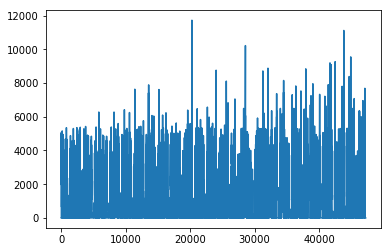

In [ ]:
c8['p_sum'].plot()
plt.show()

## Random Forest

In [ ]:
changyuanwithpsum = c6[pd.isna(c6['p_sum']) == False]
changyuanwithoutpsum = c6[pd.isna(c6['p_sum'])]

In [ ]:
variables = ['meterType','slaveAddr', 'blockId','wire','freq','ae_tot','re_tot']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(changyuanwithpsum[variables], changyuanwithpsum['p_sum'])

generated_psum = rf.predict(X = changyuanwithoutpsum[variables])

C:\Users\Derni\AppData\Local\Continuum\anaconda3\envs\derni\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [ ]:
len(generated_psum)

22222

In [ ]:
changyuanwithoutpsum['p_sum'] = generated_psum.astype(int)

C:\Users\Derni\AppData\Local\Continuum\anaconda3\envs\derni\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
changyuan = changyuanwithpsum.append(changyuanwithoutpsum)

# Resample each block

In [20]:
c1['lastReportTime'] = pd.to_datetime(c1['lastReportTime'], errors='coerce')
c1.set_index('lastReportTime', inplace=True)
c1 = c1.resample('h').mean()
c1 = c1.reset_index()
c2['lastReportTime'] = pd.to_datetime(c2['lastReportTime'], errors='coerce')
c2.set_index('lastReportTime', inplace=True)
c2 = c2.resample('h').mean()
c2 = c2.reset_index()
c3['lastReportTime'] = pd.to_datetime(c3['lastReportTime'], errors='coerce')
c3.set_index('lastReportTime', inplace=True)
c3 = c3.resample('h').mean()
c3 = c3.reset_index()
c4['lastReportTime'] = pd.to_datetime(c4['lastReportTime'], errors='coerce')
c4.set_index('lastReportTime', inplace=True)
c4 = c4.resample('h').mean()
c4 = c4.reset_index()
c5['lastReportTime'] = pd.to_datetime(c5['lastReportTime'], errors='coerce')
c5.set_index('lastReportTime', inplace=True)
c5 = c5.resample('h').mean()
c5 = c5.reset_index()
c6['lastReportTime'] = pd.to_datetime(c6['lastReportTime'], errors='coerce')
c6.set_index('lastReportTime', inplace=True)
c6 = c6.resample('h').mean()
c6 = c6.reset_index()
c7['lastReportTime'] = pd.to_datetime(c7['lastReportTime'], errors='coerce')
c7.set_index('lastReportTime', inplace=True)
c7 = c7.resample('h').mean()
c7 = c7.reset_index()
c8['lastReportTime'] = pd.to_datetime(c8['lastReportTime'], errors='coerce')
c8.set_index('lastReportTime', inplace=True)
c8 = c8.resample('h').mean()
c8 = c8.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
c1.to_csv('../Data/C1_07-12.csv')
c2.to_csv('../Data/C2_07-12.csv')
c3.to_csv('../Data/C3_07-12.csv')
c4.to_csv('../Data/C4_07-12.csv')
c5.to_csv('../Data/C5_07-12.csv')
c6.to_csv('../Data/C6_07-12.csv')
c7.to_csv('../Data/C7_07-12.csv')
c8.to_csv('../Data/C8_07-12.csv')

# Spearman Correlation

In [ ]:
c1 = pd.read_csv('../Data/C1_07-12.csv')
c2 = pd.read_csv('../Data/C2_07-12.csv')
c3 = pd.read_csv('../Data/C3_07-12.csv')
c4 = pd.read_csv('../Data/C4_07-12.csv')
c5 = pd.read_csv('../Data/C5_07-12.csv')
c6 = pd.read_csv('../Data/C6_07-12.csv')
c7 = pd.read_csv('../Data/C7_07-12.csv')
c8 = pd.read_csv('../Data/C8_07-12.csv')

In [ ]:
c5.head()

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot
0,2020-07-01 00:00:00,3.0,2.0,5.0,1.0,59.988182,4149.000000,67933.527273,49847.454545
1,2020-07-01 01:00:00,3.0,2.0,5.0,1.0,60.003636,16421.818182,67945.181818,49855.590909
2,2020-07-01 02:00:00,3.0,2.0,5.0,1.0,60.016364,22852.000000,67961.500000,49866.763636
3,2020-07-01 03:00:00,3.0,2.0,5.0,1.0,59.998182,13531.818182,67979.009091,49878.872727
4,2020-07-01 04:00:00,3.0,2.0,5.0,1.0,59.987500,748.916667,67987.483333,49884.783333


In [ ]:
c1['p_sum'].describe()

count     4001.000000
mean      3845.385079
std       5433.369824
min          0.000000
25%          0.000000
50%        836.000000
75%       5779.333333
max      22538.666667
Name: p_sum, dtype: float64

In [ ]:
c1.columns

Index(['lastReportTime', 'meterType', 'slaveAddr', 'blockId', 'wire', 'freq',
       'p_sum', 'ae_tot', 're_tot'],
      dtype='object')

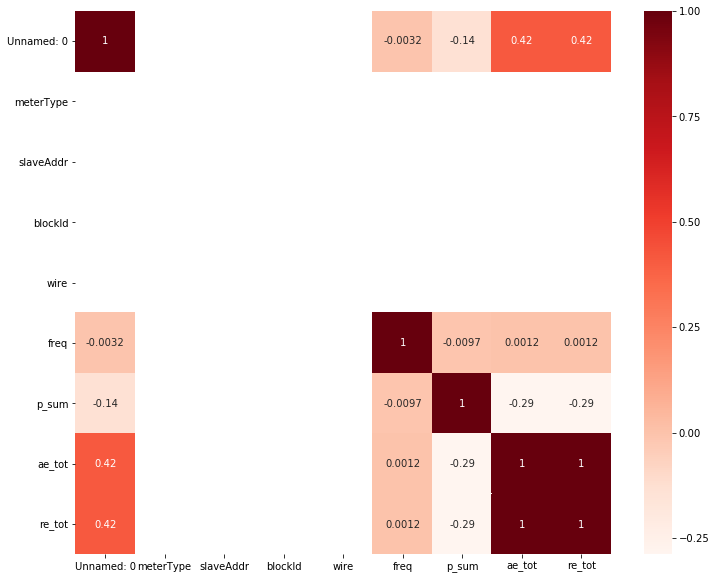

In [ ]:
plt.figure(figsize=(12,10))
cor = c1.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = (cor["p_sum"])

In [ ]:
relevant_features = cor_target[cor_target>0]
relevant_features

p_sum     1.000000
ae_tot    0.023697
Name: p_sum, dtype: float64

# Feature Engineering
## Create Additional Feature

In [21]:
c1['lastReportTime'] = pd.to_datetime(c1['lastReportTime'], errors='coerce')
c1 = c1.assign(session=pd.cut(c1['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
c2['lastReportTime'] = pd.to_datetime(c2['lastReportTime'], errors='coerce')
c2 = c2.assign(session=pd.cut(c2['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
c3['lastReportTime'] = pd.to_datetime(c3['lastReportTime'], errors='coerce')
c3 = c3.assign(session=pd.cut(c3['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
c4['lastReportTime'] = pd.to_datetime(c4['lastReportTime'], errors='coerce')
c4 = c4.assign(session=pd.cut(c4['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
c5['lastReportTime'] = pd.to_datetime(c5['lastReportTime'], errors='coerce')
c5 = c5.assign(session=pd.cut(c5['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
c6['lastReportTime'] = pd.to_datetime(c6['lastReportTime'], errors='coerce')
c6 = c6.assign(session=pd.cut(c6['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
c7['lastReportTime'] = pd.to_datetime(c7['lastReportTime'], errors='coerce')
c7 = c7.assign(session=pd.cut(c7['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
c8['lastReportTime'] = pd.to_datetime(c8['lastReportTime'], errors='coerce')
c8 = c8.assign(session=pd.cut(c8['lastReportTime'].dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))

In [22]:
c1['session'] = c1['session'].cat.add_categories('Midnight')
c1['session'] = c1['session'].fillna('Midnight')
c2['session'] = c2['session'].cat.add_categories('Midnight')
c2['session'] = c2['session'].fillna('Midnight')
c3['session'] = c3['session'].cat.add_categories('Midnight')
c3['session'] = c3['session'].fillna('Midnight')
c4['session'] = c4['session'].cat.add_categories('Midnight')
c4['session'] = c4['session'].fillna('Midnight')
c5['session'] = c5['session'].cat.add_categories('Midnight')
c5['session'] = c5['session'].fillna('Midnight')
c6['session'] = c6['session'].cat.add_categories('Midnight')
c6['session'] = c6['session'].fillna('Midnight')
c7['session'] = c7['session'].cat.add_categories('Midnight')
c7['session'] = c7['session'].fillna('Midnight')
c8['session'] = c8['session'].cat.add_categories('Midnight')
c8['session'] = c8['session'].fillna('Midnight')

In [23]:
c1['session'] = c1['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
c2['session'] = c2['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
c3['session'] = c3['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
c4['session'] = c4['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
c5['session'] = c5['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
c6['session'] = c6['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
c7['session'] = c7['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})
c8['session'] = c8['session'].replace({'Night':0,'Midnight':1,'Morning':2,'Afternoon':3,'Evening':4})

In [24]:
c1['weekend'] = np.where((c1['lastReportTime']).dt.dayofweek < 5,0,1)
c2['weekend'] = np.where((c2['lastReportTime']).dt.dayofweek < 5,0,1)
c3['weekend'] = np.where((c3['lastReportTime']).dt.dayofweek < 5,0,1)
c4['weekend'] = np.where((c4['lastReportTime']).dt.dayofweek < 5,0,1)
c5['weekend'] = np.where((c5['lastReportTime']).dt.dayofweek < 5,0,1)
c6['weekend'] = np.where((c6['lastReportTime']).dt.dayofweek < 5,0,1)
c7['weekend'] = np.where((c7['lastReportTime']).dt.dayofweek < 5,0,1)
c8['weekend'] = np.where((c8['lastReportTime']).dt.dayofweek < 5,0,1)

In [26]:
c2['session'].isna().sum()

0

In [27]:
c1.head()

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,session,weekend
0,2020-07-01 00:00:00,3.0,2.0,1.0,1.0,59.992500,15146.666667,32536.583333,9532.225000,1,0
1,2020-07-01 01:00:00,3.0,2.0,1.0,1.0,60.002727,15707.181818,32552.318182,9537.709091,0,0
2,2020-07-01 02:00:00,3.0,2.0,1.0,1.0,60.014167,18187.583333,32569.141667,9543.558333,0,0
3,2020-07-01 03:00:00,3.0,2.0,1.0,1.0,59.998333,16370.666667,32586.808333,9550.033333,0,0
4,2020-07-01 04:00:00,3.0,2.0,1.0,1.0,59.986667,18013.000000,32604.708333,9556.666667,0,0


# Merge with Temperature Dataset

In [28]:
d_two = pd.read_csv('Taipei_temperature_202007-202104.csv',sep=',',engine='python')

In [29]:
d_two['lastReportTime'] = pd.to_datetime(d_two['lastReportTime'], errors='coerce')
d_two = d_two[['Temperature', 'lastReportTime']]

In [30]:
cid1 = pd.merge(c1, d_two, left_on='lastReportTime', right_on='lastReportTime')
cid2 = pd.merge(c2, d_two, left_on='lastReportTime', right_on='lastReportTime')
cid3 = pd.merge(c3, d_two, left_on='lastReportTime', right_on='lastReportTime')
cid4 = pd.merge(c4, d_two, left_on='lastReportTime', right_on='lastReportTime')
cid5 = pd.merge(c5, d_two, left_on='lastReportTime', right_on='lastReportTime')
cid6 = pd.merge(c6, d_two, left_on='lastReportTime', right_on='lastReportTime')
cid7 = pd.merge(c7, d_two, left_on='lastReportTime', right_on='lastReportTime')
cid8 = pd.merge(c8, d_two, left_on='lastReportTime', right_on='lastReportTime')
cid1.head()

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,session,weekend,Temperature
0,2020-07-01 00:00:00,3.0,2.0,1.0,1.0,59.992500,15146.666667,32536.583333,9532.225000,1,0,27.2
1,2020-07-01 01:00:00,3.0,2.0,1.0,1.0,60.002727,15707.181818,32552.318182,9537.709091,0,0,29.1
2,2020-07-01 02:00:00,3.0,2.0,1.0,1.0,60.014167,18187.583333,32569.141667,9543.558333,0,0,28.9
3,2020-07-01 03:00:00,3.0,2.0,1.0,1.0,59.998333,16370.666667,32586.808333,9550.033333,0,0,28.6
4,2020-07-01 04:00:00,3.0,2.0,1.0,1.0,59.986667,18013.000000,32604.708333,9556.666667,0,0,28.5


In [32]:
cid1.to_csv('C1(202007-202104)_interpolation_full.csv')
cid2.to_csv('C2(202007-202104)_interpolation_full.csv')
cid3.to_csv('C3(202007-202104)_interpolation_full.csv')
cid4.to_csv('C4(202007-202104)_interpolation_full.csv')
cid5.to_csv('C5(202007-202104)_interpolation_full.csv')
cid6.to_csv('C6(202007-202104)_interpolation_full.csv')
cid7.to_csv('C7(202007-202104)_interpolation_full.csv')
cid8.to_csv('C8(202007-202104)_interpolation_full.csv')

In [33]:
cid1

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,session,weekend,Temperature
0,2020-07-01 00:00:00,3.0,2.0,1.0,1.0,59.992500,15146.666667,32536.583333,9532.225000,1,0,27.2
1,2020-07-01 01:00:00,3.0,2.0,1.0,1.0,60.002727,15707.181818,32552.318182,9537.709091,0,0,29.1
2,2020-07-01 02:00:00,3.0,2.0,1.0,1.0,60.014167,18187.583333,32569.141667,9543.558333,0,0,28.9
3,2020-07-01 03:00:00,3.0,2.0,1.0,1.0,59.998333,16370.666667,32586.808333,9550.033333,0,0,28.6
4,2020-07-01 04:00:00,3.0,2.0,1.0,1.0,59.986667,18013.000000,32604.708333,9556.666667,0,0,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...
7434,2021-04-28 19:00:00,3.0,2.0,1.0,1.0,60.010833,0.000000,49457.200000,15871.900000,4,0,18.4
7435,2021-04-28 20:00:00,3.0,2.0,1.0,1.0,59.990000,0.000000,49457.200000,15871.900000,4,0,18.4
7436,2021-04-28 21:00:00,3.0,2.0,1.0,1.0,59.990000,0.000000,49457.200000,15871.900000,4,0,18.3
7437,2021-04-28 22:00:00,3.0,2.0,1.0,1.0,59.983333,609.583333,49457.266667,15871.941667,4,0,18.4


# Combine every ID

In [34]:
combine = pd.concat([cid1,cid2,cid3,cid4,cid5,cid6,cid7,cid8])
combine

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,session,weekend,Temperature
0,2020-07-01 00:00:00,3.0,2.0,1.0,1.0,59.992500,15146.666667,32536.583333,9532.225000,1,0,27.2
1,2020-07-01 01:00:00,3.0,2.0,1.0,1.0,60.002727,15707.181818,32552.318182,9537.709091,0,0,29.1
2,2020-07-01 02:00:00,3.0,2.0,1.0,1.0,60.014167,18187.583333,32569.141667,9543.558333,0,0,28.9
3,2020-07-01 03:00:00,3.0,2.0,1.0,1.0,59.998333,16370.666667,32586.808333,9550.033333,0,0,28.6
4,2020-07-01 04:00:00,3.0,2.0,1.0,1.0,59.986667,18013.000000,32604.708333,9556.666667,0,0,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...
7434,2021-04-28 19:00:00,3.0,2.0,8.0,1.0,60.010000,0.000000,10103.500000,31747.300000,4,0,18.4
7435,2021-04-28 20:00:00,3.0,2.0,8.0,1.0,59.987000,0.000000,10103.500000,31747.300000,4,0,18.4
7436,2021-04-28 21:00:00,3.0,2.0,8.0,1.0,59.990000,0.000000,10103.500000,31747.300000,4,0,18.3
7437,2021-04-28 22:00:00,3.0,2.0,8.0,1.0,59.976667,0.000000,10103.500000,31747.300000,4,0,18.4


In [35]:
combine['lastReportTime'] = pd.to_datetime(combine['lastReportTime'], errors='coerce')
combine.set_index('lastReportTime', inplace=True)
combine = combine.resample('h').mean()
combine = combine.reset_index()
combine.head()

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,session,weekend,Temperature
0,2020-07-01 00:00:00,3.0,2.0,4.5,1.0,59.992330,6528.054451,27153.204735,24148.821496,1,0,27.2
1,2020-07-01 01:00:00,3.0,2.0,4.5,1.0,60.005261,10085.829545,27161.810227,24154.327614,0,0,29.1
2,2020-07-01 02:00:00,3.0,2.0,4.5,1.0,60.015095,11364.466856,27171.934375,24160.932481,0,0,28.9
3,2020-07-01 03:00:00,3.0,2.0,4.5,1.0,60.000000,10192.567235,27182.831723,24168.148295,0,0,28.6
4,2020-07-01 04:00:00,3.0,2.0,4.5,1.0,59.987292,5875.416667,27191.283333,24172.686458,0,0,28.5


In [36]:
combine.to_csv('changyuanbuilding(202007-202104)_interpolation.csv')
combine

,lastReportTime,meterType,slaveAddr,blockId,wire,freq,p_sum,ae_tot,re_tot,session,weekend,Temperature
0,2020-07-01 00:00:00,3.0,2.0,4.5,1.0,59.992330,6528.054451,27153.204735,24148.821496,1,0,27.2
1,2020-07-01 01:00:00,3.0,2.0,4.5,1.0,60.005261,10085.829545,27161.810227,24154.327614,0,0,29.1
2,2020-07-01 02:00:00,3.0,2.0,4.5,1.0,60.015095,11364.466856,27171.934375,24160.932481,0,0,28.9
3,2020-07-01 03:00:00,3.0,2.0,4.5,1.0,60.000000,10192.567235,27182.831723,24168.148295,0,0,28.6
4,2020-07-01 04:00:00,3.0,2.0,4.5,1.0,59.987292,5875.416667,27191.283333,24172.686458,0,0,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...
7243,2021-04-28 19:00:00,3.0,2.0,4.5,1.0,60.009811,316.795455,43576.833049,39501.929072,4,0,18.4
7244,2021-04-28 20:00:00,3.0,2.0,4.5,1.0,59.991102,236.892045,43577.115909,39502.410227,4,0,18.4
7245,2021-04-28 21:00:00,3.0,2.0,4.5,1.0,59.988750,256.807765,43577.349905,39502.853220,4,0,18.3
7246,2021-04-28 22:00:00,3.0,2.0,4.5,1.0,59.980312,446.500000,43577.633333,39503.315625,4,0,18.4


In [40]:
combine = combine.interpolate()
combine.isna().sum()

lastReportTime    0
meterType         0
slaveAddr         0
blockId           0
wire              0
freq              0
p_sum             0
ae_tot            0
re_tot            0
session           0
weekend           0
Temperature       0
dtype: int64

In [41]:
fig = go.Figure(go.Scatter(y=combine['p_sum'], name='Actual'))
fig.update_layout(title_text='Power Consumption - Changyuan Building', xaxis_title='N data(hour)', yaxis_title='Power Consumption(W)')
pio.show(fig)